# Metadata overview

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [2]:
# load metadata

df_meta = pd.read_csv("datasets_output/df_pub.csv",compression="gzip")
df_cord = pd.read_csv("datasets_input/CORD19_2020_05_12/metadata.csv")

In [3]:
df_meta.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,pmid,pmcid,dimensions_id,arxiv_id,timestamp
0,0,‘A ticking time bomb’: Scientists worry about ...,"CAPE TOWN, SOUTH AFRICA—Late on Sunday evening...",2020.0,NaN,Science,NaN,NaN,NaN,0.1126/science.abb7331,NaN,NaN,NaN,NaN,2020-05-14 17:36:03.858343
1,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,32036640.0,NaN,pub.1124777091,NaN,2020-05-14 17:36:03.858343
2,2,Cohesion in Distancing.,"In isolation, we are physically apart; in soli...",2020.0,4.0,The AMA Journal of Ethic,22,4,e344-345,10.1001/amajethics.2020.344,32345430.0,NaN,pub.1127182341,NaN,2020-05-14 17:36:03.858343
3,3,Another Piece of the Puzzle: Human Metapneumov...,BACKGROUND: Each winter respiratory viruses ac...,2008.0,12.0,Archives of Internal Medicine,NaN,NaN,NaN,10.1001/archinte.168.22.2489,19064834.0,pmc2783624,NaN,NaN,2020-05-14 17:36:03.858343
4,4,Viral etiology of severe pneumonia among Kenya...,CONTEXT: Pneumonia is the leading cause of chi...,2010.0,5.0,JAMA,NaN,NaN,NaN,10.1001/jama.2010.675,20501927.0,pmc2968755,NaN,NaN,2020-05-14 17:36:03.858343


In [4]:
df_meta.columns

Index(['pub_id', 'title', 'abstract', 'publication_year', 'publication_month',
       'journal', 'volume', 'issue', 'pages', 'doi', 'pmid', 'pmcid',
       'dimensions_id', 'arxiv_id', 'timestamp'],
      dtype='object')

#### Publication years

In [5]:
import re

def clean_year(s):
    if pd.isna(s):
        return np.nan
    if not (s>1900):
        return np.nan
    elif s>2020:
        return 2020
    return s

df_meta["publication_year"] = df_meta["publication_year"].apply(clean_year)

In [6]:
df_meta.publication_year.describe()

count    83355.000000
mean      2013.957219
std          8.278215
min       1951.000000
25%       2010.000000
50%       2017.000000
75%       2020.000000
max       2020.000000
Name: publication_year, dtype: float64

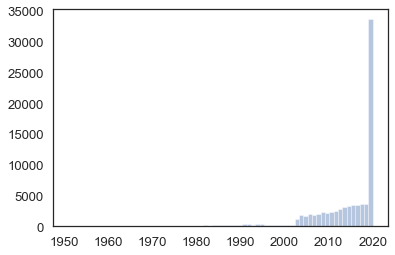

In [7]:
sns.distplot(df_meta.publication_year.tolist(), bins=70, kde=False)

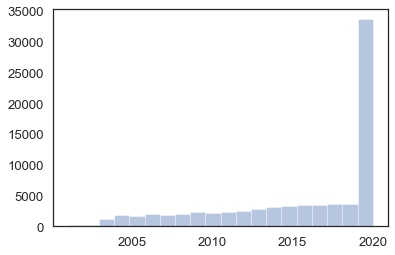

In [8]:
sns.distplot(df_meta[(pd.notnull(df_meta.publication_year)) & (df_meta.publication_year > 2000)].publication_year.tolist(), bins=20, hist=True, kde=False)

In [9]:
df_meta["abstract_length"] = df_meta.abstract.str.len()

In [10]:
df_meta[df_meta.abstract_length>0].shape

(62021, 16)

#### Null values

In [11]:
df_meta.shape

(83363, 16)

In [12]:
sum(pd.notnull(df_meta.abstract))

62021

In [13]:
sum(pd.notnull(df_meta.doi))

78972

In [14]:
sum(pd.notnull(df_meta.pmcid))

54113

In [15]:
sum(pd.notnull(df_meta.pmid))

52733

In [16]:
sum(pd.notnull(df_meta.journal))

78630

#### Journals

In [17]:
df_meta.journal.value_counts()[:30]

medRxiv                                            2398
Journal of Virology                                1768
SSRN Electronic Journal                            1626
PLoS One                                           1560
Virology                                            943
arXiv                                               780
The Lancet                                          746
Emerg Infect Dis                                    741
bioRxiv                                             719
Research Square                                     698
Viruses                                             617
Virus Research                                      567
Journal of Clinical Virology                        552
Vaccine                                             530
Arch Virol                                          501
Sci Rep                                             480
Veterinary Microbiology                             469
The Lancet Infectious Diseases                  

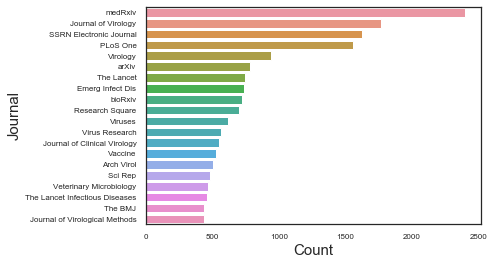

In [18]:
df_sub = df_meta[df_meta.journal.isin(df_meta.journal.value_counts()[:20].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=8)

#### Sources and licenses

For CORD19

In [19]:
df_cord.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998.0,green-oa,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/b2897e1277f56641193a6...,document_parses/pmc_json/PMC125340.xml.json,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704.0,green-oa,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/e3d0d482ebd9a8ba81c25...,document_parses/pmc_json/PMC125375.xml.json,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125.0,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,document_parses/pdf_json/00b1d99e70f779eb4ede5...,document_parses/pmc_json/PMC125543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723.0,green-oa,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/cf584e00f637cbd8f1bb3...,document_parses/pmc_json/PMC126080.xml.json,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663.0,green-oa,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/dde02f11923815e6a16a3...,document_parses/pmc_json/PMC136939.xml.json,http://europepmc.org/articles/pmc136939?pdf=re...


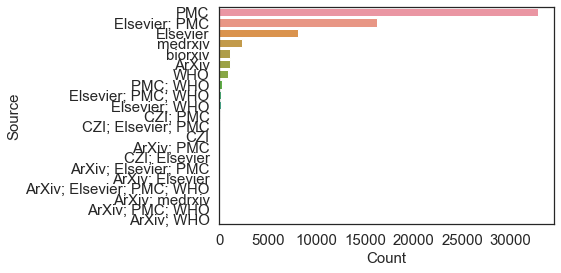

In [20]:
# source
df_sub = df_cord[df_cord.source_x.isin(df_cord.source_x.value_counts()[:30].index.tolist())]
b = sns.countplot(y="source_x", data=df_sub, order=df_sub['source_x'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Source",fontsize=15)
b.tick_params(labelsize=15)

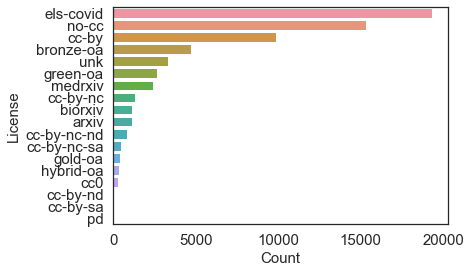

In [21]:
# license
df_sub = df_cord[df_cord.license.isin(df_cord.license.value_counts()[:30].index.tolist())]
b = sns.countplot(y="license", data=df_sub, order=df_sub['license'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("License",fontsize=15)
b.tick_params(labelsize=15)

#### Full text availability

In [34]:
df_cord["has_full_text"] = pd.notnull(df_cord.pmc_json_files)

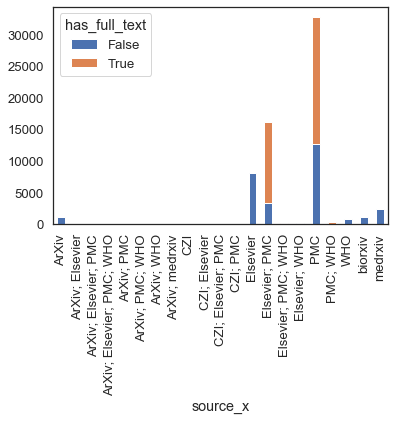

In [37]:
# full text x source
df_plot = df_cord.groupby(['has_full_text', 'source_x']).size().reset_index().pivot(columns='has_full_text', index='source_x', values=0)
df_plot.plot(kind='bar', stacked=True)

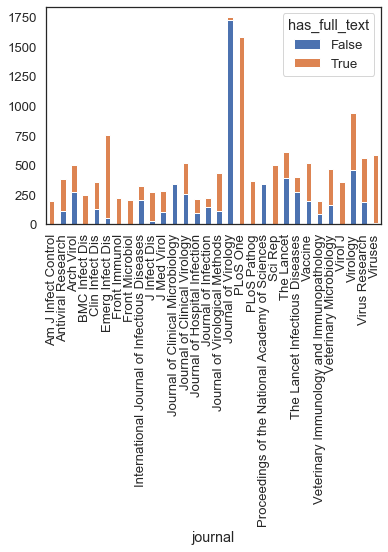

In [38]:
# full text x journal
df_sub = df_cord[df_cord.journal.isin(df_cord.journal.value_counts()[:30].index.tolist())]
df_plot = df_sub.groupby(['has_full_text', 'journal']).size().reset_index().pivot(columns='has_full_text', index='journal', values=0)
df_plot.plot(kind='bar', stacked=True)

### Overlap of CORD19 with Dimensions and WHO

This is still problematically low..

In [39]:
# datasets

who_latest = "datasets_input/WHO_12_05_2020.csv"
dimensions_latest = "datasets_input/Dimensions_12_05_2020.csv"

df_who = pd.read_csv(who_latest)
df_dimensions = pd.read_csv(dimensions_latest)

In [40]:
who_dois = df_who[pd.notnull(df_who["DOI"])]["DOI"].tolist()
dimensions_dois = df_dimensions[pd.notnull(df_dimensions["DOI"])]["DOI"].tolist()

In [41]:
cord_dois = df_cord[pd.notnull(df_cord["doi"])]["doi"].tolist()

In [42]:
len(cord_dois)

59162

In [43]:
len(set(cord_dois).intersection(set(who_dois)))/len(set(who_dois))

0.22983003815469996

In [44]:
len(set(cord_dois).intersection(set(dimensions_dois)))/len(set(dimensions_dois))

0.43062988884314535

In [45]:
len(set(who_dois).intersection(set(dimensions_dois)))/len(set(dimensions_dois))

0.3049889591676335

## Abstracts

In [46]:
abstracts = df_meta[pd.notnull(df_meta["abstract"])].abstract.tolist()
abstracts[1]

'In isolation, we are physically apart; in solidarity, we are together. The COVID-19 pandemic emphasizes our social responsibility to maintain...'

#### Topic modelling

In [78]:
from tqdm import tqdm
import gensim, sklearn, spacy
import pyLDAvis.gensim

In [31]:
!python -m spacy download en


    Linking successful
    /anaconda3/envs/covid/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/envs/covid/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [79]:
nlp = spacy.load('en')
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

In [80]:
%%time

processed_docs = list()
for doc in nlp.pipe(abstracts, n_threads=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    #ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than one word.
    #doc.extend([str(entity) for entity in ents if len(entity) > 1])
                        
    processed_docs.append(doc)

CPU times: user 1h 34min 13s, sys: 8min 20s, total: 1h 42min 34s
Wall time: 28min 18s


In [81]:
import pickle

pickle.dump(processed_docs, open("datasets_output/processed_docs.pk", "wb"))

In [50]:
import pickle

processed_docs = pickle.load(open("datasets_output/processed_docs.pk", "rb"))

In [82]:
docs = processed_docs
del processed_docs

# Add bigrams
from gensim.models.phrases import Phrases
# Add bigrams to docs (only ones that appear several times or more). A better approach would be to use a chi_sq test.
bigram = Phrases(docs, min_count=50)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [83]:
# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 10

In [84]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of docs: %d (%d)' % (len(corpus),len(abstracts)))

Number of unique tokens: 14389
Number of docs: 39154 (39154)


In [85]:
%%time

from gensim.models import LdaMulticore, LdaModel
params = {'num_topics': 15,'passes': 3, 'random_state': seed}
model = LdaModel(corpus=corpus, num_topics=params['num_topics'], id2word=dictionary, #workers=6,
                passes=params['passes'], random_state=params['random_state'])

CPU times: user 1min 24s, sys: 796 ms, total: 1min 24s
Wall time: 1min 23s


In [86]:
model.show_topics(num_words=5, num_topics=params['num_topics'])

[(0,
  '0.049*"respiratory" + 0.047*"virus" + 0.041*"infection" + 0.023*"viral" + 0.023*"child"'),
 (1,
  '0.048*"rna" + 0.028*"sequence" + 0.024*"virus" + 0.024*"gene" + 0.015*"genome"'),
 (2,
  '0.079*"influenza" + 0.023*"influenza_virus" + 0.022*"case" + 0.018*"pandemic" + 0.012*"virus"'),
 (3,
  '0.025*"group" + 0.023*"diarrhea" + 0.022*"pig" + 0.021*"day" + 0.019*"strain"'),
 (4,
  '0.016*"rat" + 0.013*"increase" + 0.012*"group" + 0.011*"study" + 0.011*"effect"'),
 (5,
  '0.038*"protein" + 0.024*"virus" + 0.021*"cell" + 0.015*"activity" + 0.014*"viral"'),
 (6,
  '0.056*"cell" + 0.025*"infection" + 0.022*"mouse" + 0.019*"virus" + 0.018*"response"'),
 (7,
  '0.026*"calf" + 0.025*"assay" + 0.024*"sample" + 0.021*"test" + 0.021*"pcr"'),
 (8,
  '0.030*"sars" + 0.030*"cov" + 0.029*"antibody" + 0.027*"coronavirus" + 0.024*"protein"'),
 (9,
  '0.034*"virus" + 0.022*"disease" + 0.022*"human" + 0.017*"animal" + 0.013*"specie"'),
 (10,
  '0.020*"disease" + 0.015*"review" + 0.014*"vaccine" + 

In [87]:
# plot topics (NOTE: the IDs here do not match those from the model)
data =  pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

In [110]:
# topics over time
# the topics of ALL the documents of our corpus

df_local = df_meta[pd.notnull(df_meta["abstract"])]
publication_years = df_local.publication_year.tolist()
dois = df_local.doi.tolist()
topics = np.zeros((len(docs),params['num_topics']))

for n,doc_topics in enumerate(model.get_document_topics(corpus)):
    for t in doc_topics:
        topics[n][t[0]] = t[1]

In [111]:
topics[0,:]

array([0.03333401, 0.03333402, 0.03333398, 0.03333421, 0.03333408,
       0.03333404, 0.03333399, 0.03333408, 0.03333404, 0.03333401,
       0.53332347, 0.03333399, 0.03333404, 0.03333413, 0.03333398])

In [112]:
model.get_document_topics(corpus[0])

[(0, 0.033333972),
 (1, 0.033333976),
 (2, 0.033333942),
 (3, 0.033334054),
 (4, 0.03333404),
 (5, 0.033333994),
 (6, 0.03333395),
 (7, 0.033334035),
 (8, 0.033333994),
 (9, 0.033333965),
 (10, 0.033334073),
 (11, 0.033333957),
 (12, 0.033334),
 (13, 0.53332406),
 (14, 0.03333394)]

In [113]:
df_topics = pd.DataFrame(topics)

In [114]:
df_topics["year"] = publication_years
df_topics["doi"] = dois

In [115]:
from_which_year = 2000

grouped = df_topics.groupby('year')
df_grouped = grouped.aggregate(np.mean)
df_grouped = df_grouped[df_grouped.index >= from_which_year]
#df_grouped

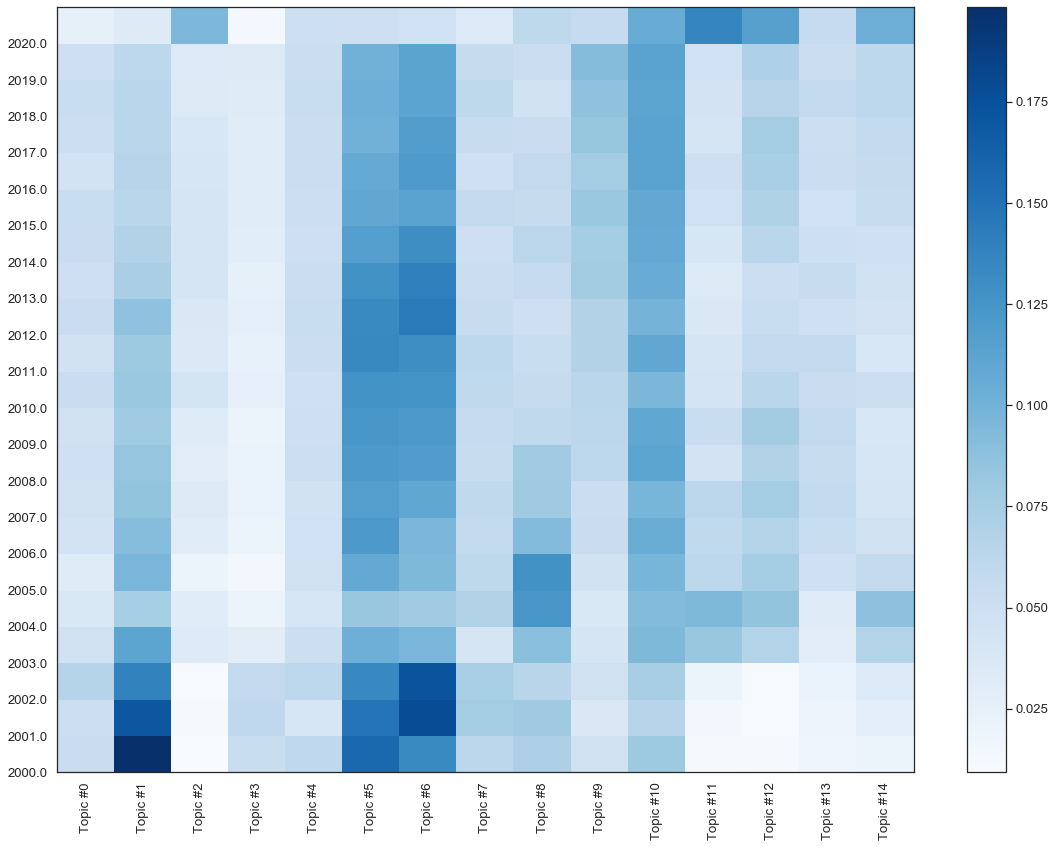

In [116]:
fig = plt.figure(figsize=(16, 12))
plt.pcolor(df_grouped.to_numpy(), norm=None, cmap='Blues')
plt.yticks(np.arange(df_grouped.to_numpy().shape[0]), df_grouped.index.values)
plt.xticks(np.arange(df_grouped.to_numpy().shape[1])+0.5, ["Topic #"+str(n) for n in range(model.num_topics)], rotation = 90)
plt.colorbar(cmap='Blues')  # plot colorbar
plt.tight_layout()  # fixes margins
plt.show()

#### Language modelling

In [118]:
from gensim.models import Word2Vec
import pickle

processed_docs = pickle.load(open("datasets_output/processed_docs.pk", "rb"))

model = Word2Vec(processed_docs, size=256, window=10, min_count=2, workers=6)

In [119]:
model.wv.most_similar("coronavirus")

[('covs', 0.6251739263534546),
 ('cov', 0.5501048564910889),
 ('betacoronavirus', 0.5166511535644531),
 ('hcov', 0.48612651228904724),
 ('hcovs', 0.4802132546901703),
 ('coronaviruses', 0.48010629415512085),
 ('astrovirus', 0.4582931399345398),
 ('virus', 0.4369690418243408),
 ('scovs', 0.4323999881744385),
 ('alphacoronavirus', 0.4261910915374756)]

#### Keyword extraction

Using [RAKE](https://csurfer.github.io/rake-nltk/_build/html/index.html)

In [126]:
from rake_nltk import Rake

# Uses stopwords for English from NLTK, and all puntuation characters by default
r = Rake(min_length=2)

# Extraction given the text
r.extract_keywords_from_text(abstracts[1])

In [127]:
# To get keyword phrases ranked highest to lowest.
r.get_ranked_phrases()[:10]

['serological andpathogenic microorganism test results',
 'provide reasonable suggestions',
 '100 countries around',
 'interstitial lung disease',
 'disease onset characteristics',
 'onset ild',
 'lung injury',
 'image characteristics',
 'spread rapidly',
 'repair caused']

In [128]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:10]

[(25.0, 'serological andpathogenic microorganism test results'),
 (9.0, 'provide reasonable suggestions'),
 (9.0, '100 countries around'),
 (8.5, 'interstitial lung disease'),
 (8.0, 'disease onset characteristics'),
 (4.5, 'onset ild'),
 (4.5, 'lung injury'),
 (4.5, 'image characteristics'),
 (4.0, 'spread rapidly'),
 (4.0, 'repair caused')]

In [123]:
len(processed_docs)

39154

In [124]:
r = Rake(min_length=2, max_length=3)
# Extraction given the list of strings where each string is a sentence.
r.extract_keywords_from_sentences([" ".join(d) for d in processed_docs])

In [125]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:50]

[(9.0, 'welcome adam vaughan'),
 (9.0, 'wash hand thoroughly'),
 (9.0, 'understand pandemic datum'),
 (9.0, 'trypsin cod trypsin'),
 (9.0, 'trichothecene mycotoxin deoxynivalenol'),
 (9.0, 'tolerance self rna'),
 (9.0, 'summarize presentation discussion'),
 (9.0, 'suffer cold addition'),
 (9.0, 'substitute mask alternative'),
 (9.0, 'strategy widely applicable'),
 (9.0, 'start codon suggest'),
 (9.0, 'speak italy day'),
 (9.0, 'set richard smyth'),
 (9.0, 'sensible way plan'),
 (9.0, 'scary hard stand'),
 (9.0, 'remain committed neurorehabilitation'),
 (9.0, 'rely quarantine isolation'),
 (9.0, 'pneumonia problem worldwide'),
 (9.0, 'new york dutton'),
 (9.0, 'need think containment'),
 (9.0, 'method general interest'),
 (9.0, 'measure cleavage angiotensin'),
 (9.0, 'knowledge sars high'),
 (9.0, 'join faculty worker'),
 (9.0, 'influence hbv transcription'),
 (9.0, 'individual different value'),
 (9.0, 'illustrate application pandemic'),
 (9.0, 'haq posthoc conclusion'),
 (9.0, 'febril